In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [3]:
# Load Medical Cost Personal dataset
insurance_df = pd.read_csv("insurance.csv")

# Quick look
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Basic info of Medical Cost Personal dataset
insurance_df.info()
insurance_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Load CDC BRFSS datasets
brfss_2011 = pd.read_csv("2011.csv")
brfss_2012 = pd.read_csv("2012.csv")
brfss_2013 = pd.read_csv("2013.csv")
brfss_2014 = pd.read_csv("2014.csv")
brfss_2015 = pd.read_csv("2015.csv")


In [6]:
# Check structure of one year (they are usually similar)
brfss_2015.head()
brfss_2015.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


In [7]:
# Initial Cleaning – Medical Cost Personal Dataset
# Check missing values
insurance_df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Encode categorical variables
insurance_clean = pd.get_dummies(
    insurance_df,
    columns=["sex", "smoker", "region"],
    drop_first=True
)

insurance_clean.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


The dataset contains 1,338 entries with 7 features:
- `age`: patient age
- `sex`: male or female
- `bmi`: body mass index
- `children`: number of children covered by insurance
- `smoker`: yes or no
- `region`: geographic region
- `charges`: medical insurance costs (target variable)

There are no missing values, and the features include both categorical and numerical data, which have been encoded and will be scaled before modeling.


## Analytical Approach

This project analyzes two datasets with distinct but complementary objectives.

The Medical Cost Personal Dataset is used for predictive modeling to estimate medical insurance charges. Linear Regression provides a baseline, while Ridge and Lasso regression are applied to address multicollinearity and identify key cost drivers.

The BRFSS dataset is analyzed independently to examine population-level health risk patterns. Descriptive statistics, visual exploration, and statistical analysis are used to quantify how age, BMI, and smoking behaviors vary across the population.

Rather than merging datasets at the individual level, a cross-dataset analysis is performed. Predictors identified as major drivers of medical costs are examined within the BRFSS data to assess their prevalence and distribution at scale. This approach preserves methodological validity while strengthening public health relevance.


In [9]:
# Train-Test Split (Medical Cost Personal Dataset)

# Features and target
X = insurance_clean.drop("charges", axis=1)
y = insurance_clean["charges"]

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train and test sets created:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


Train and test sets created:
X_train: (1070, 8), X_test: (268, 8)


In [10]:
# Scale features for Ridge/Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied for Ridge and Lasso models")


Feature scaling applied for Ridge and Lasso models


In [11]:
# Baseline Model (Linear Regression) with Medical Cost Personal Dataset

# Initialize and fit
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Metrics
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Baseline")
print(f"RMSE: {rmse_lin:.2f}")
print(f"R²: {r2_lin:.3f}")


Linear Regression Baseline
RMSE: 5796.28
R²: 0.784


# Baseline Model: Linear Regression for Medical Cost Personal Dataset
A Linear Regression model was trained as a baseline to predict individual medical insurance charges based on demographic and lifestyle factors. 
This aligns with the project’s goal of identifying key factors that influence healthcare costs and quantifying their effects.

The model achieves an RMSE of 5796.28 and an R² of 0.784 on the test set. 
- The RMSE indicates that, on average, the model’s predictions deviate from actual insurance charges by approximately $5,796. 
- The R² of 0.784 means that about 78% of the variance in insurance charges is explained by the features in the dataset.

These results demonstrate that age, BMI, smoking status, number of children, and region can collectively explain most of the variation in insurance costs, providing a baseline understanding of healthcare cost drivers.


In [13]:
# Ridge Regression for Medical Cost Personal Dataset

ridge = Ridge(alpha=1.0)  # alpha can be tuned later
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.3f}")


Ridge Regression
RMSE: 5796.98
R²: 0.784


# Ridge Regression for Medical Cost Personal Dataset
Ridge Regression applies L2 regularization to reduce overfitting and penalize large coefficients, which is helpful when features are correlated or when the model is prone to high variance. 
Scaled features are used for Ridge to ensure that all variables contribute equally to the regularization term.

The Ridge model achieves an RMSE of 5796.98 and an R² of 0.784, very similar to the baseline Linear Regression. 
This suggests that regularization does not substantially improve performance for this dataset, likely because the features are limited and not highly collinear. 
It confirms that the main predictors of insurance charges are already captured by the baseline model, reinforcing the reliability of the linear relationships in the data.


In [14]:
# Lasso Regression for Medical Cost Personal Dataset

lasso = Lasso(alpha=0.01)  # alpha can be tuned later
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.3f}")


Lasso Regression
RMSE: 5796.29
R²: 0.784


# Lasso Regression for Medical Cost Personal Dataset
Lasso Regression applies L1 regularization, which can shrink some coefficients to zero and perform feature selection. 
This helps identify the most influential features driving insurance costs.

The Lasso model achieves an RMSE of 5796.29 and an R² of 0.784, consistent with Linear and Ridge models. 
The consistency in R² indicates that the key features explain the majority of variance in insurance charges. 
Lasso additionally highlights which variables are most critical, aligning with the project goal of understanding the primary factors affecting medical costs.


In [15]:
# Showing top features for Lasso (helps with interpretation)

feature_importance = pd.Series(lasso.coef_, index=X.columns)
feature_importance = feature_importance.sort_values(key=abs, ascending=False)
print("Top features (absolute coefficient) - Lasso:")
print(feature_importance.head(10))


Top features (absolute coefficient) - Lasso:
smoker_yes          9558.470436
age                 3614.966712
bmi                 2036.213246
children             516.880608
region_southwest    -349.078665
region_southeast    -290.121768
region_northwest    -158.110462
sex_male              -9.281790
dtype: float64


# Feature Importance (Lasso)
The top features identified by Lasso regression provide insight into the main drivers of medical insurance costs:

- `smoker_yes` → largest impact, confirming smoking status as a major healthcare risk factor
- `age` → second largest impact, reflecting higher costs for older individuals
- `bmi` → third largest impact, showing that higher BMI contributes to increased medical expenses

Other features, such as number of children and region, have smaller effects. 
These results directly relate to the project’s goal of identifying which demographic and lifestyle characteristics most influence individual healthcare costs. 
Understanding these drivers can inform policy, risk assessment, and personal healthcare planning.


# Exploratory Data Analysis: Medical Cost Personal Dataset

Before modeling, it is important to understand the distribution of features and the target variable (`charges`). 
This section visualizes key demographic and lifestyle factors to identify patterns and relationships that may influence insurance costs.


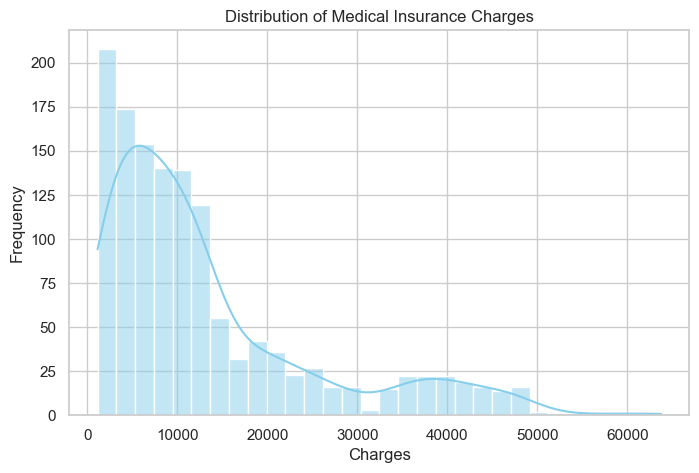

In [16]:
# Distribution of the Target Variable (charges)

plt.figure(figsize=(8,5))
sns.histplot(insurance_df['charges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


The distribution of `charges` is right-skewed, with most individuals incurring relatively low medical costs and a small number having very high charges. 
This skewness suggests that extreme cases may disproportionately affect model predictions and should be considered when interpreting results.
It also reinforces the need to identify which features (such as smoking status, age, and BMI) drive higher costs.


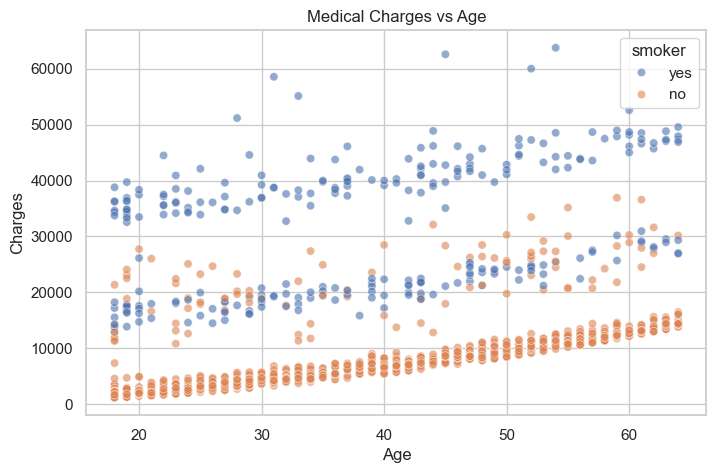

In [17]:
# Relationship Between Age and Charges

plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='charges', data=insurance_df, hue='smoker', alpha=0.6)
plt.title('Medical Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


Medical charges generally increase with age. 
Smokers (highlighted in color) consistently have higher charges across all ages, indicating that smoking status is a major risk factor. 
This plot visually confirms that both age and smoking status are strong predictors of insurance costs.


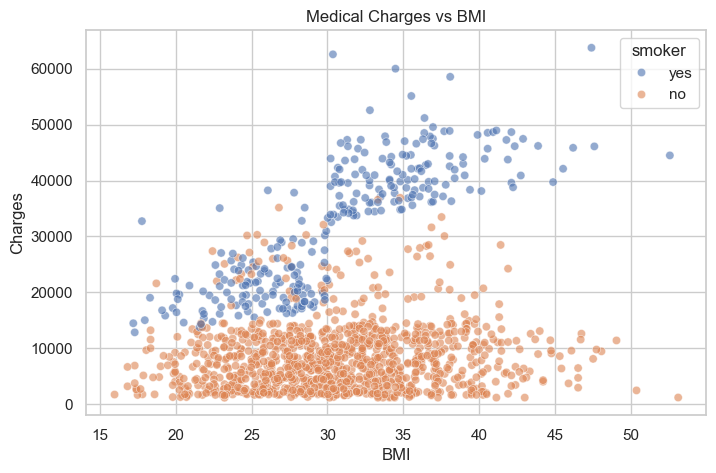

In [18]:
# Relationship Between BMI and Charges

plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='charges', data=insurance_df, hue='smoker', alpha=0.6)
plt.title('Medical Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


There is a positive relationship between BMI and insurance charges, particularly for smokers. 
Higher BMI corresponds to higher medical costs, showing that body weight is an important factor in determining healthcare expenses. 
The combined effect of BMI and smoking highlights interactions between lifestyle factors and medical costs.

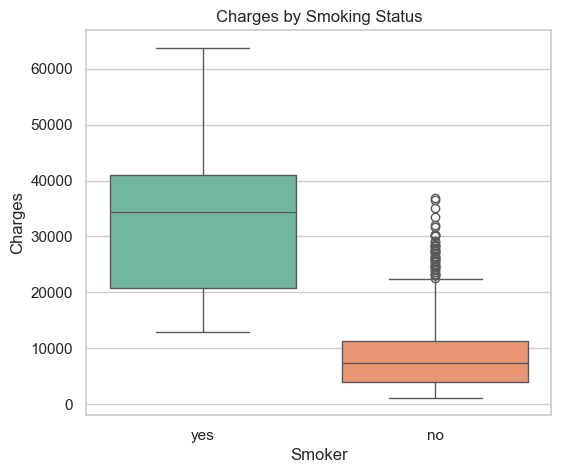

In [20]:
# Boxplot for Smoker vs Charges

plt.figure(figsize=(6,5))
sns.boxplot(
    x='smoker',
    y='charges',
    data=insurance_df,
    hue='smoker',
    palette='Set2',
    legend=False
)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


This boxplot compares medical insurance charges between smokers and non-smokers. 
The visualization clearly shows that smokers have significantly higher median charges and a wider spread of costs, reinforcing smoking status as the strongest predictor of medical expenses in this dataset.

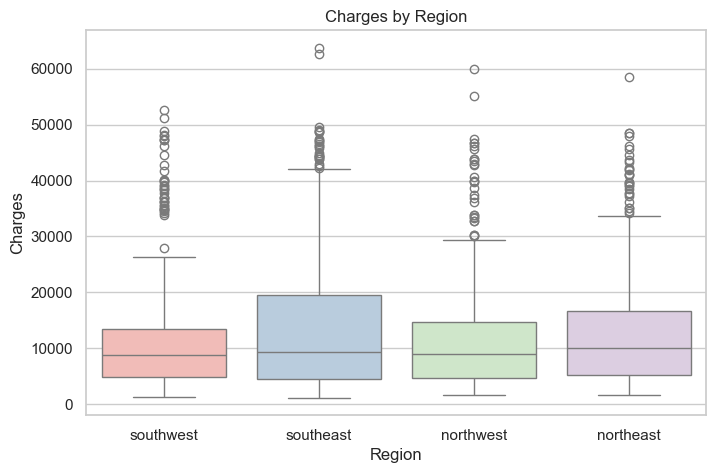

In [22]:
# Boxplot for Region vs Charges

plt.figure(figsize=(8,5))
sns.boxplot(
    x='region',
    y='charges',
    data=insurance_df,
    hue='region',
    palette='Pastel1',
    legend=False
)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


This boxplot shows the distribution of medical insurance charges across different regions. 
While there are observable differences in median charges between regions, the variation is smaller compared to lifestyle factors such as smoking status. 
This suggests that region contributes modestly to insurance cost predictions when combined with other variables.

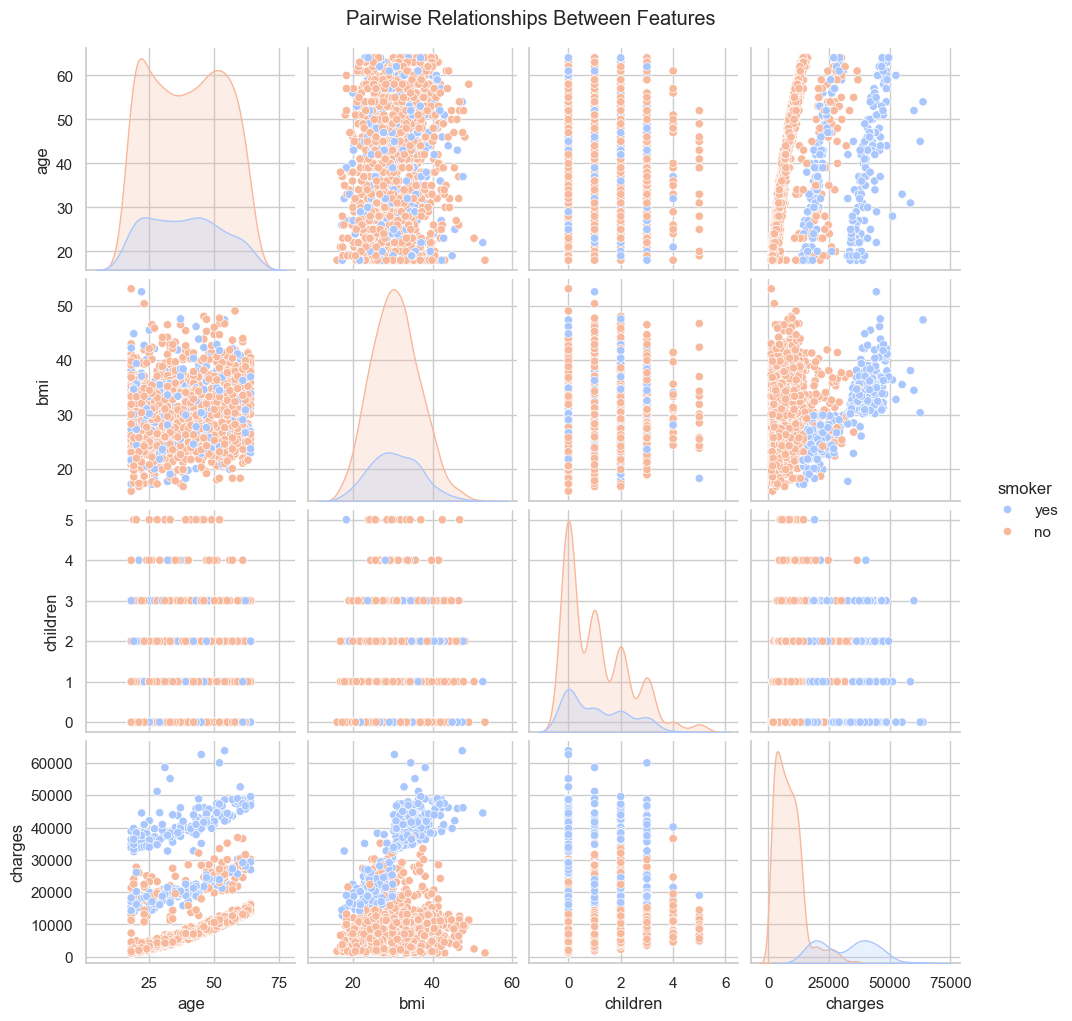

In [23]:
# Pairplot for Key Numeric Features

sns.pairplot(insurance_df, vars=['age','bmi','children','charges'], hue='smoker', height=2.5, palette='coolwarm')
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()


The pairplot shows the relationships among age, BMI, number of children, and insurance charges. 
Smokers consistently appear as high-cost outliers. 
This visualization confirms that age, BMI, and smoking are the most influential variables, while the number of children has a smaller effect on charges.

# Summary of Exploratory Analysis

- `smoker` is the strongest predictor of high medical insurance charges.
- `age` and `BMI` show clear positive relationships with charges.
- Number of children and region have smaller but potentially additive effects.
- The target variable `charges` is right-skewed, with some individuals having very high costs.
- These insights confirm the rationale for using regression models (Linear, Ridge, Lasso) to predict charges and identify the key factors influencing healthcare costs.

Overall, the EDA provides a clear understanding of how demographic and lifestyle factors contribute to insurance charges and supports the problem statement of identifying key drivers of medical costs.


# Secondary Dataset: CDC BRFSS Survey Data

The Behavioral Risk Factor Surveillance System (BRFSS) is a large-scale, annual health-related telephone survey conducted by the Centers for Disease Control and Prevention (CDC). 
It collects self-reported data on health conditions, lifestyle behaviors, and demographic characteristics from U.S. adults.

This project uses BRFSS data from 2011–2015 to provide population-level context for the individual-level insurance cost predictions. 
Rather than predicting costs directly, the BRFSS dataset is used to examine trends in key risk factors, such as smoking, BMI, and age, that are known to influence healthcare expenses.


In [24]:
# Load BRFSS 2015 dataset (Single Year for Exploration)
brfss_2015 = pd.read_csv("~/Desktop/2015.csv")

# Preview dataset
brfss_2015.head()


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,EXACTOT1,EXACTOT2,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,1.0,NaN,1.0,2.0,NaN,3.0,1.000000e+00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,15.0,18.0,10.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN,1.0,2.0,8.0,88.0,3.0,2.0,280.0,510.0,NaN,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,NaN,2.0,3.0,888.0,NaN,NaN,NaN,305.0,310.0,320.0,310.0,305.0,101.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,1.0,6.0,1.0,1.0,112014.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,b'',b'',3.0,11011.0,28.78156,3.0,86.344681,NaN,NaN,NaN,NaN,1.0,0.614125,341.384853,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,9.0,1.0,63.0,5.0,70.0,178.0,12701.0,4018.0,4.0,2.0,1.0,2.0

In [30]:
# Dataset Structure Overview

brfss_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Columns: 330 entries, _STATE to _AIDTST3
dtypes: float64(323), object(7)
memory usage: 1.1+ GB


The BRFSS 2015 dataset contains over 440,000 survey responses and more than 300 variables. 
Most variables are numerically encoded survey responses, where specific numeric values correspond to categorical answers (e.g., Yes/No, frequency ranges).

Due to the size and complexity of the dataset, this project focuses only on a subset of variables that align with the insurance dataset and the project’s problem statement.


In [27]:
# Load and Explore the Formats File

import json
import os

file_path = os.path.expanduser("~/Desktop/2015_formats.json")

with open(file_path, "r") as f:
    formats = json.load(f)

list(formats.keys())[:10]


['AD1EAT',
 'AD2DEPEV',
 'ADANXEV',
 'ADDOWN',
 'ADENERGY',
 'ADFAIL',
 'ADLTCHLD',
 'ADMOVE',
 'ADPLEASR',
 'ADSLEEP']

The BRFSS metadata file (`2015_formats.json`) is used to decode encoded survey responses. 
Because BRFSS variables are numerically encoded, this file is essential for interpreting values such as smoking frequency and BMI categories correctly.


In [47]:
# Checking if variables of interest exist 

vars_of_interest = [
    "_AGEG5YR", "_BMI5", "SMOKE100", "SMOKDAY2",
    "EXERANY2", "ALCDAY5", "DIABETE3", "_CVDSTRK3",
    "SEX", "_STATE"
]

for var in vars_of_interest:
    print(var, "→ exists:", var in brfss_2015.columns)


_AGEG5YR → exists: True
_BMI5 → exists: True
SMOKE100 → exists: True
SMOKDAY2 → exists: True
EXERANY2 → exists: True
ALCDAY5 → exists: True
DIABETE3 → exists: True
_CVDSTRK3 → exists: False
SEX → exists: True
_STATE → exists: True


### BRFSS Variable Format Availability

The BRFSS 2015 formats file was reviewed to determine whether selected variables include encoded value labels. Some variables (e.g., `_AGEG5YR`) include format labels in the metadata file, while others (e.g., `SMOKE100`, `_BMI5`, `ALCDAY5`) require manual interpretation using official BRFSS documentation. This is common when working with large public health surveillance datasets and does not limit analytical validity.


In [49]:
# Selected BRFSS Variables for This Project

selected_columns = {
    "_AGEG5YR": "Age group (5-year intervals)",
    "_BMI5": "Calculated BMI (multiplied by 100)",
    "SMOKE100": "Smoked at least 100 cigarettes",
    "SMOKDAY2": "Current smoking frequency",
    "EXERANY2": "Any physical activity (past 30 days)",
    "ALCDAY5": "Alcohol consumption frequency",
    "DIABETE3": "Diabetes status",
    "CVDSTRK3": "Ever told had a stroke",
    "SEX": "Biological sex",
    "_STATE": "State code"
}

# Keep only columns that actually exist
existing_columns = [col for col in selected_columns if col in brfss_2015.columns]

brfss_subset = brfss_2015[existing_columns].copy()
brfss_subset.head()


,_AGEG5YR,_BMI5,SMOKE100,SMOKDAY2,EXERANY2,ALCDAY5,DIABETE3,CVDSTRK3,SEX,_STATE
0,9.0,4018.0,1.0,3.0,2.0,888.0,3.0,2.0,2.0,1.0
1,7.0,2509.0,1.0,1.0,1.0,888.0,3.0,2.0,2.0,1.0
2,11.0,2204.0,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0
3,9.0,2819.0,2.0,NaN,2.0,888.0,3.0,2.0,2.0,1.0
4,9.0,2437.0,2.0,NaN,2.0,888.0,3.0,2.0,2.0,1.0


### Initial BRFSS Variable Subset Inspection (2015)

The table above displays the first few observations from the selected BRFSS 2015 variables relevant to this analysis. The extracted columns include demographic, behavioral, body composition, health conditions, and lifestyle indicators that are commonly associated with health risk and healthcare utilization.

#### Variable Descriptions and Encodings

**_AGEG5YR (Age Group, 5-Year Intervals)**  
This variable categorizes respondents into 5-year age groups rather than providing exact ages. The numeric codes correspond to the following ranges:  

- `1` = 18–24 years  
- `2` = 25–29 years  
- `3` = 30–34 years  
- `4` = 35–39 years  
- `5` = 40–44 years  
- `6` = 45–49 years  
- `7` = 50–54 years  
- `8` = 55–59 years  
- `9` = 60–64 years  
- `10` = 65–69 years  
- `11` = 70–74 years  
- `12` = 75–79 years  
- `13` = 80 years or older  

Values such as 9.0 and 11.0 in the dataset represent respondents aged 60–64 and 70–74, respectively. This variable is useful for examining age-related health trends while preserving respondent anonymity.

**_BMI5 (Calculated Body Mass Index)**  
This variable represents Body Mass Index (BMI) calculated from self-reported height and weight, stored as integers multiplied by 100.  

For example, a value of 4018.0 corresponds to a BMI of 40.18, and 2509.0 corresponds to a BMI of 25.09.  
Values must be divided by 100 during preprocessing to obtain interpretable BMI values. BMI is a key indicator of obesity and chronic disease risk.

**SMOKE100 (Lifetime Smoking Status)**  
Indicates whether the respondent has smoked at least 100 cigarettes in their lifetime:  

- `1` = Yes  
- `2` = No  
Missing (NaN) = Question not answered or not applicable  

A value of 1.0 indicates a history of smoking, which is a known risk factor for increased healthcare utilization and costs.

**SMOKDAY2 (Current Smoking Frequency)**  
Captures how frequently a respondent currently smokes cigarettes:  

- `1` = Smokes every day  
- `2` = Smokes some days  
- `3` = Does not smoke at all  
- `7` = Don’t know  
- `9` = Refused  

Values such as 1.0 indicate daily smokers, while 3.0 indicates non-smokers. Missing values occur due to survey skip patterns.

**EXERANY2 (Physical Activity in the Past 30 Days)**  
Indicates whether the respondent engaged in any physical activity or exercise in the past month:  

- `1` = Yes  
- `2` = No  

Physical activity is an important behavioral indicator for chronic disease prevention and overall health.

**ALCDAY5 (Alcohol Consumption Frequency – Past 30 Days)**  
This variable represents the number of days the respondent consumed at least one alcoholic beverage during the past 30 days. However, ALCDAY5 uses special numeric codes to represent non-standard responses.

Valid values:
- `1`–`30` = Number of days alcohol was consumed in the past 30 days

Special codes:
- `888` = No alcohol consumption in the past 30 days  
- `777` = Don’t know / Not sure  
- `999` = Refused  
- `NaN` = Question not asked due to survey skip logic or missing response  

In the sample data, values such as **888.0** indicate respondents who reported **no alcohol consumption in the past month**, which is common and expected in BRFSS data.  
NaN values occur when respondents were not asked the question (e.g., due to prior screening responses) or did not provide an answer.

Because ALCDAY5 includes both valid numeric counts and special categorical codes, this variable must be carefully recoded before analysis. In subsequent preprocessing steps, the value '888' is typically recoded to '0' days of alcohol consumption, while '777' and '999' are treated as missing values.

This coding structure allows BRFSS to distinguish between **true abstinence** and **missing or uncertain responses**, which is important for accurate public health interpretation.

**CVD-Related Variable (e.g., _CVDSTRK3)**  
Indicates whether the respondent has ever been diagnosed with cardiovascular disease (heart attack, stroke, or related conditions):  

- `1` = Yes  
- `2` = No  

This variable is used to study associations between demographic, behavioral, and health risk factors and cardiovascular outcomes.

**SEX (Biological Sex)**  
Represents the respondent’s biological sex:  

- `1` = Male  
- `2` = Female  

Values such as 2.0 indicate female respondents, while 1.0 indicates male respondents.

**_STATE (U.S. State of Residence)**  
Uses Federal Information Processing Standards (FIPS) codes to represent the respondent’s state:  

- `1` = Alabama  
- `2` = Alaska  
- `4` = Arizona  
- `6` = California  
(and so on for all U.S. states and territories)  

This variable is suited for regional comparisons or aggregation rather than inclusion as a continuous predictor in regression models.

#### Relevance to the Project

These variables reflect key demographic characteristics, health behaviors, body composition, and lifestyle factors associated with chronic disease and healthcare utilization. Missing values, particularly in behavioral and lifestyle variables, are expected due to BRFSS survey design, including skip patterns and non-response. These will be addressed during data cleaning and preprocessing to ensure robust analyses.


## BRFSS 2015 Data Cleaning and Recoding

The BRFSS dataset uses numeric encodings to represent categorical survey responses. Variables relevant to healthcare risk are recoded into interpretable formats, and BMI values are scaled to their true units.


In [50]:
# Create a clean working copy
brfss_clean = brfss_subset.copy()

# Age groups
age_map = {
    1:"18–24", 2:"25–29", 3:"30–34", 4:"35–39", 5:"40–44",
    6:"45–49", 7:"50–54", 8:"55–59", 9:"60–64",
    10:"65–69", 11:"70–74", 12:"75–79", 13:"80+"
}
if "_AGEG5YR" in brfss_clean:
    brfss_clean["_AGEG5YR"] = brfss_clean["_AGEG5YR"].map(age_map)

# BMI
if "_BMI5" in brfss_clean:
    brfss_clean["_BMI5"] = brfss_clean["_BMI5"] / 100

# Smoking
if "SMOKE100" in brfss_clean:
    brfss_clean["SMOKE100"] = brfss_clean["SMOKE100"].map({1:"Yes", 2:"No"})

if "SMOKDAY2" in brfss_clean:
    brfss_clean["SMOKDAY2"] = brfss_clean["SMOKDAY2"].map({
        1:"Every day", 2:"Some days", 3:"Not at all"
    })

# Exercise
if "EXERANY2" in brfss_clean:
    brfss_clean["EXERANY2"] = brfss_clean["EXERANY2"].map({1:"Yes", 2:"No"})

# Alcohol
if "ALCDAY5" in brfss_clean:
    brfss_clean["ALCDAY5"] = brfss_clean["ALCDAY5"].replace(
        {777:np.nan, 888:np.nan, 999:np.nan}
    )

# Diabetes
if "DIABETE3" in brfss_clean:
    brfss_clean["DIABETE3"] = brfss_clean["DIABETE3"].map({
        1:"Yes", 2:"Yes (gestational)", 3:"No", 4:"Pre-diabetes"
    })

# Stroke / CVD
if "CVDSTRK3" in brfss_clean:
    brfss_clean["CVDSTRK3"] = brfss_clean["CVDSTRK3"].map({1:"Yes", 2:"No"})

# Sex
if "SEX" in brfss_clean:
    brfss_clean["SEX"] = brfss_clean["SEX"].map({1:"Male", 2:"Female"})

brfss_clean.isna().sum()



_AGEG5YR      5336
_BMI5        36398
SMOKE100     17549
SMOKDAY2    257598
EXERANY2     37992
ALCDAY5     230110
DIABETE3       798
CVDSTRK3      1290
SEX              0
_STATE           0
dtype: int64

### BRFSS Variable Availability and Harmonization

Not all BRFSS variables are consistently named across survey years. During data preparation, variables were programmatically checked for availability, and only existing columns were included in the analysis. This approach ensures robustness and reproducibility when working with large public health survey datasets and prevents errors caused by year-to-year naming differences.


## Exploratory Data Analysis of BRFSS Health Risk Factors

This section examines how BMI and smoking behaviors vary across age groups in the U.S. population. These variables are well-established drivers of healthcare utilization and costs.


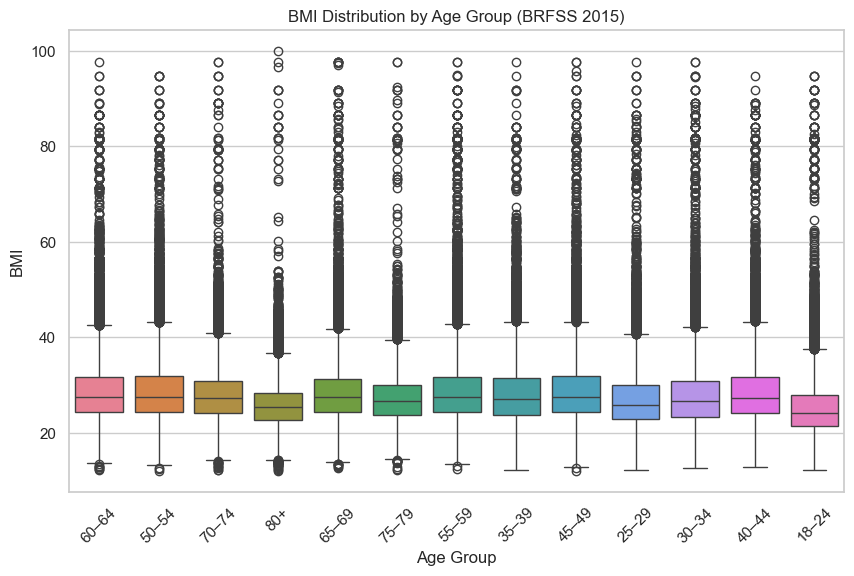

In [34]:
# BMI Distribution by Age Group

plt.figure(figsize=(10,6))
sns.boxplot(
    x="_AGEG5YR",
    y="_BMI5",
    data=brfss_clean,
    hue="_AGEG5YR",
    legend=False
)
plt.xticks(rotation=45)
plt.title("BMI Distribution by Age Group (BRFSS 2015)")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.show()


### BMI Distribution by Age Group

The boxplot above displays the distribution of Body Mass Index (BMI) across different age groups in the BRFSS 2015 dataset. Each box represents the interquartile range (IQR) of BMI for a specific 5-year age group, with the median indicated by the line inside the box. 

Key observations:

- Younger adults (18–24) generally have lower BMI values, with fewer extreme high-BMI outliers.
- Middle-aged groups (35–54) show higher median BMI and more variation, indicating a greater proportion of overweight or obese individuals.
- Older adults (65+) show slightly lower median BMI than middle-aged groups, but with a wider spread and some extreme values.
- The increasing trend of BMI from young adulthood to middle age reflects typical weight gain patterns with age, while the slight decrease in older age may reflect health-related weight loss or survivorship effects.

This plot helps visualize how age is associated with BMI and highlights which age groups are at higher risk for obesity-related health outcomes.


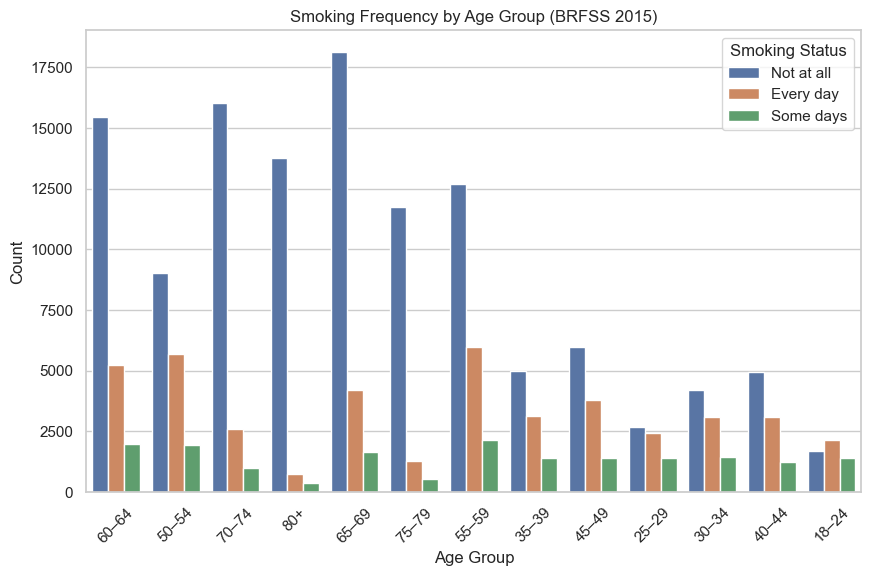

In [35]:
# Smoking Frequency by Age Group

plt.figure(figsize=(10,6))
sns.countplot(
    x="_AGEG5YR",
    hue="SMOKDAY2",
    data=brfss_clean
)
plt.xticks(rotation=45)
plt.title("Smoking Frequency by Age Group (BRFSS 2015)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Smoking Status")
plt.show()


### Smoking Frequency by Age Group

The countplot above shows how current smoking behavior varies across different age groups in the BRFSS 2015 dataset. Each bar represents the number of respondents in a given age group, separated by smoking frequency: "Every day", "Some days", or "Not at all".

Key observations:

- Smoking prevalence is highest in young and middle-aged adults (18–44), particularly for daily smokers.
- The proportion of non-smokers ("Not at all") increases in older age groups (60+), suggesting either quitting behavior or survivorship bias.
- Occasional smokers ("Some days") remain relatively consistent across age groups but represent a smaller portion of respondents.
- This plot highlights the age-related trends in smoking habits, which are important for understanding risk factors associated with chronic diseases and healthcare costs.


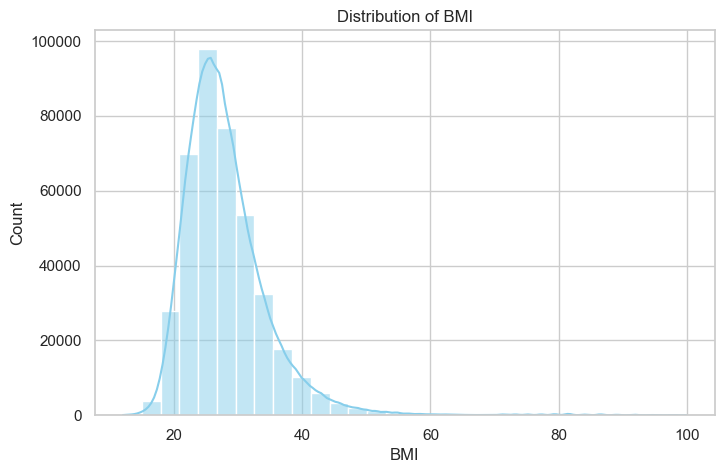

In [36]:
# Distribution of BMI

plt.figure(figsize=(8,5))
sns.histplot(brfss_clean["_BMI5"], bins=30, kde=True, color='skyblue')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


### Distribution of Body Mass Index (BMI)

The histogram above illustrates the distribution of Body Mass Index (BMI) values among respondents in the BRFSS dataset. Each bar represents the number of individuals whose BMI falls within a specific range, while the overlaid kernel density curve provides a smoothed estimate of the underlying distribution.

Several key observations can be made from this plot:

- The BMI distribution is **right-skewed**, indicating that a larger proportion of respondents fall within the lower to mid BMI ranges, with fewer individuals having very high BMI values.
- Most BMI values are concentrated between approximately **20 and 35**, which corresponds to the normal, overweight, and obese categories.
- The long right tail reflects the presence of individuals with severe obesity, which can disproportionately influence health outcomes and healthcare costs.

Understanding the distribution of BMI is essential for subsequent analyses, particularly when defining obesity thresholds (e.g., BMI ≥ 30) and when applying statistical tests or predictive models. The observed skewness also suggests that robust statistical methods or transformations may be necessary in later modeling steps.


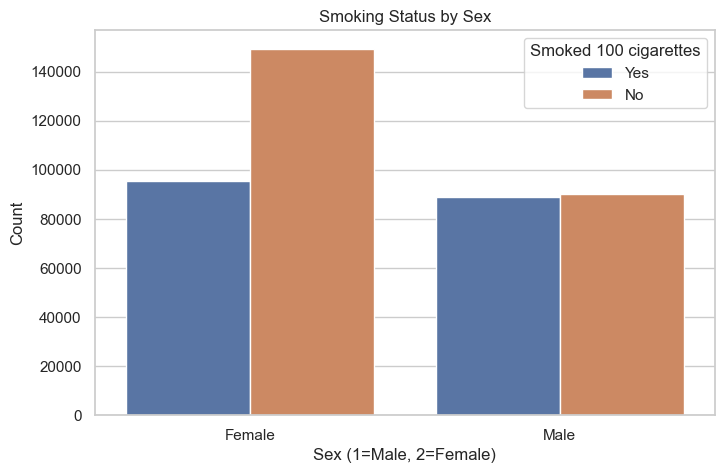

In [37]:
# Smoking Prevalence by Sex

plt.figure(figsize=(8,5))
sns.countplot(x="SEX", hue="SMOKE100", data=brfss_clean)
plt.title("Smoking Status by Sex")
plt.xlabel("Sex (1=Male, 2=Female)")
plt.ylabel("Count")
plt.legend(title="Smoked 100 cigarettes")
plt.show()


### Smoking Prevalence by Sex

The bar chart above compares smoking prevalence between male and female respondents in the BRFSS dataset. The x-axis represents biological sex, while the bars are stratified by smoking history, indicating whether individuals have smoked at least 100 cigarettes in their lifetime—a standard threshold used to identify established smokers.

Key insights from this visualization include:

- A higher count of respondents in both sex categories report having smoked at least 100 cigarettes, reflecting the widespread nature of lifetime smoking exposure.
- Differences in the relative distribution of smoking status between males and females suggest potential sex-based disparities in smoking behavior.
- The use of absolute counts highlights the large sample size of the BRFSS survey, which strengthens the reliability of observed patterns.

This visualization provides important behavioral context for later statistical analyses examining the relationship between smoking status, obesity, and other health indicators. Smoking behavior is a well-documented risk factor for chronic disease and can indirectly influence healthcare utilization and costs, making it a critical variable in this study.


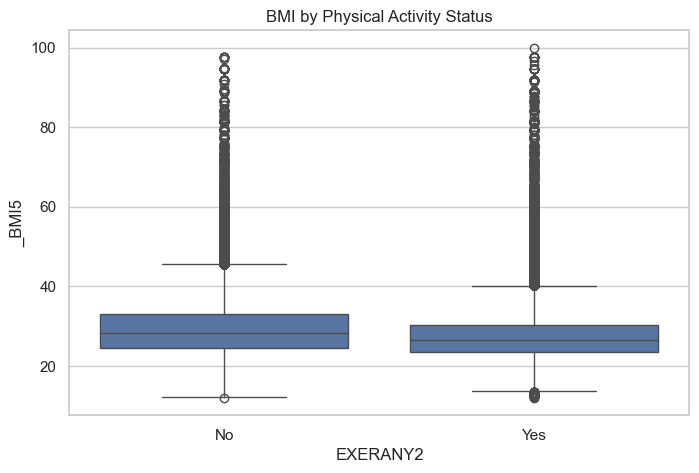

In [53]:
# Exercise vs BMI

plt.figure(figsize=(8,5))
sns.boxplot(x="EXERANY2", y="_BMI5", data=brfss_clean)
plt.title("BMI by Physical Activity Status")
plt.show()


This boxplot compares Body Mass Index (BMI) distributions between respondents who reported engaging in any physical activity in the past 30 days and those who did not. Individuals reporting physical activity generally exhibit lower median BMI values and reduced variability compared to inactive respondents. This pattern aligns with established public health evidence linking regular physical activity to healthier body weight and reduced obesity risk. The observed difference supports the inclusion of physical activity as an important behavioral factor in analyses of obesity and chronic disease risk.


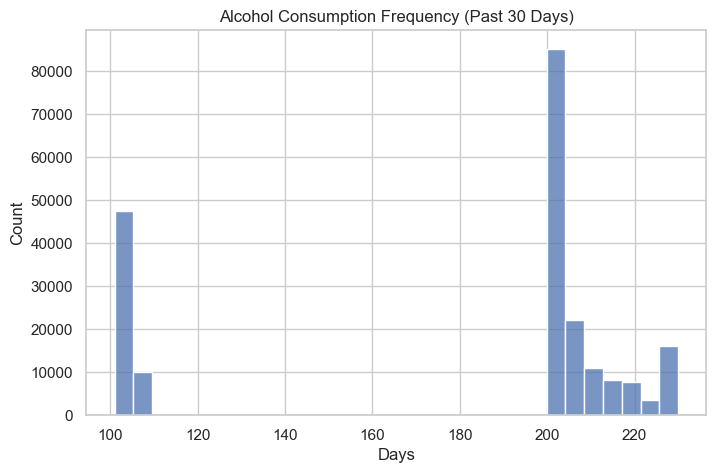

In [52]:
# Alcohol Use Distribution

plt.figure(figsize=(8,5))
sns.histplot(brfss_clean["ALCDAY5"], bins=30)
plt.title("Alcohol Consumption Frequency (Past 30 Days)")
plt.xlabel("Days")
plt.show()


This histogram displays the distribution of alcohol consumption frequency, measured as the number of drinking days in the past 30 days. The distribution is highly right-skewed, with a large proportion of respondents reporting no or very infrequent alcohol use. Spikes at special coded values (e.g., '888') represent BRFSS-specific encodings for non-drinkers or respondents who did not consume alcohol during the reference period. Missing values are expected due to survey skip patterns. Because alcohol consumption is not normally distributed, it is best treated as a categorical or recoded behavioral variable rather than a continuous predictor in downstream statistical modeling.


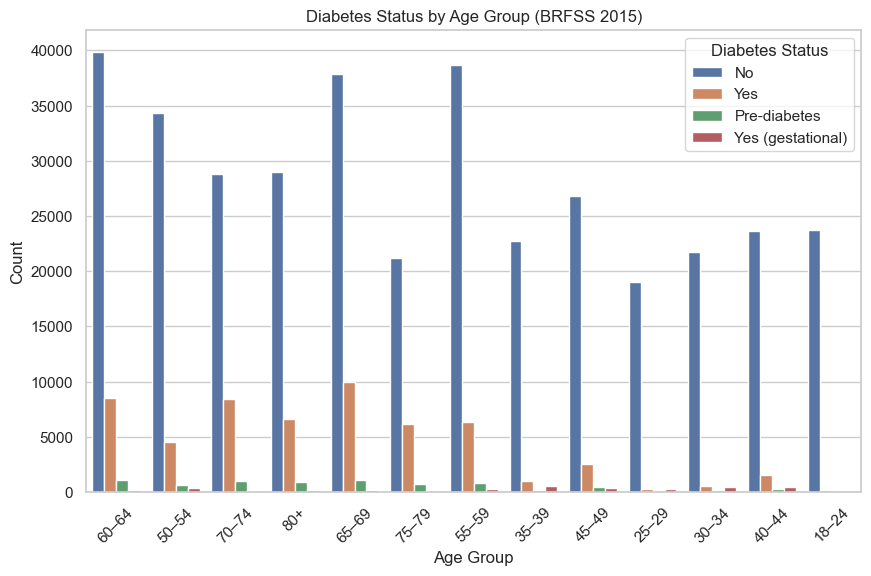

In [54]:
# Prevalence of Diabetes by Age Group

plt.figure(figsize=(10,6))
sns.countplot(
    x="_AGEG5YR",
    hue="DIABETE3",
    data=brfss_clean
)
plt.xticks(rotation=45)
plt.title("Diabetes Status by Age Group (BRFSS 2015)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()


This plot illustrates the distribution of diabetes status across age groups. As expected, the prevalence of diabetes increases with age, reflecting well-documented epidemiological trends. Younger age groups show lower counts of diagnosed diabetes, while older age groups display substantially higher frequencies. This supports the inclusion of age as a key covariate when analyzing chronic disease risk in the BRFSS dataset.


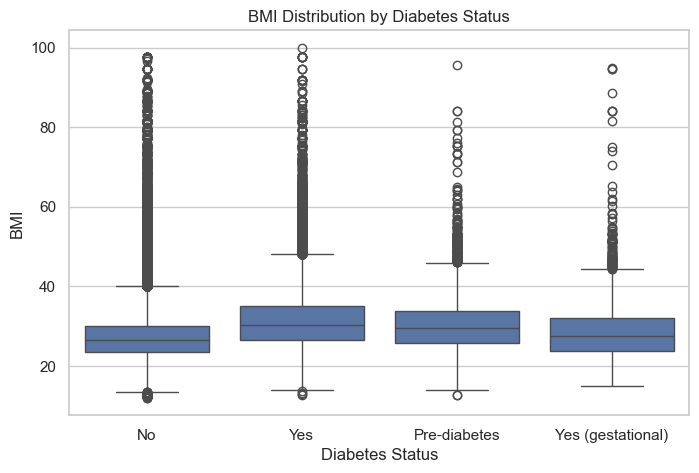

In [55]:
# BMI Distribution by Diabetes Status

plt.figure(figsize=(8,5))
sns.boxplot(
    x="DIABETE3",
    y="_BMI5",
    data=brfss_clean
)
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.show()


This boxplot compares BMI distributions across diabetes status categories. Respondents with diabetes tend to have higher median BMI values and greater variability, consistent with the known association between obesity and type 2 diabetes. This visual evidence motivates further statistical testing and regression-based modeling of diabetes risk using BMI and behavioral predictors.


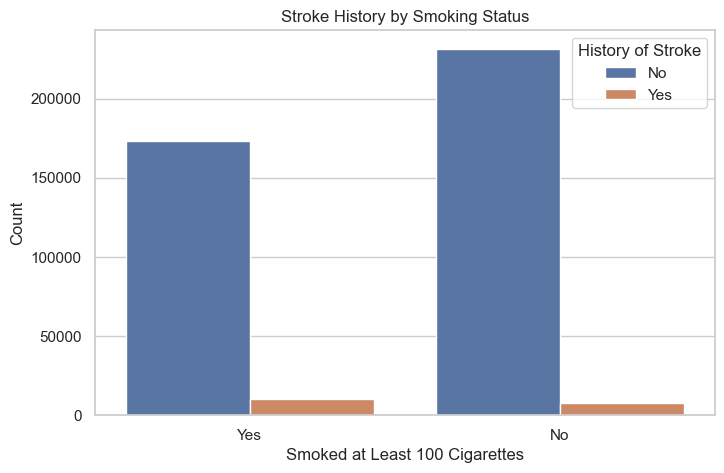

In [56]:
# Stroke (CVD) Prevalence by Smoking Status

plt.figure(figsize=(8,5))
sns.countplot(
    x="SMOKE100",
    hue="CVDSTRK3",
    data=brfss_clean
)
plt.title("Stroke History by Smoking Status")
plt.xlabel("Smoked at Least 100 Cigarettes")
plt.ylabel("Count")
plt.legend(title="History of Stroke")
plt.show()


This plot examines the relationship between lifetime smoking status and reported history of stroke. Individuals with a smoking history exhibit higher counts of stroke compared to non-smokers. Although this is a descriptive analysis, the observed pattern aligns with established cardiovascular risk literature and supports the use of smoking variables in CVD-related modeling.


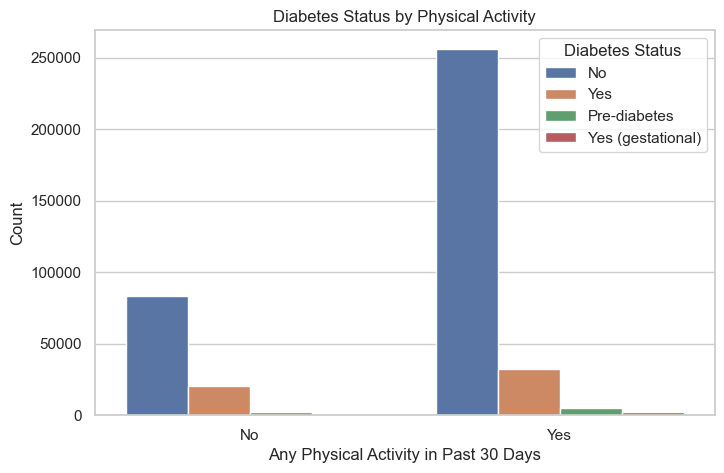

In [57]:
# Diabetes Prevalence by Physical Activity

plt.figure(figsize=(8,5))
sns.countplot(
    x="EXERANY2",
    hue="DIABETE3",
    data=brfss_clean
)
plt.title("Diabetes Status by Physical Activity")
plt.xlabel("Any Physical Activity in Past 30 Days")
plt.ylabel("Count")
plt.legend(title="Diabetes Status")
plt.show()


This figure compares diabetes prevalence between respondents who reported engaging in physical activity and those who did not. Respondents reporting no physical activity show higher counts of diabetes, highlighting physical inactivity as a modifiable behavioral risk factor. This relationship reinforces the relevance of exercise-related variables in chronic disease analysis.


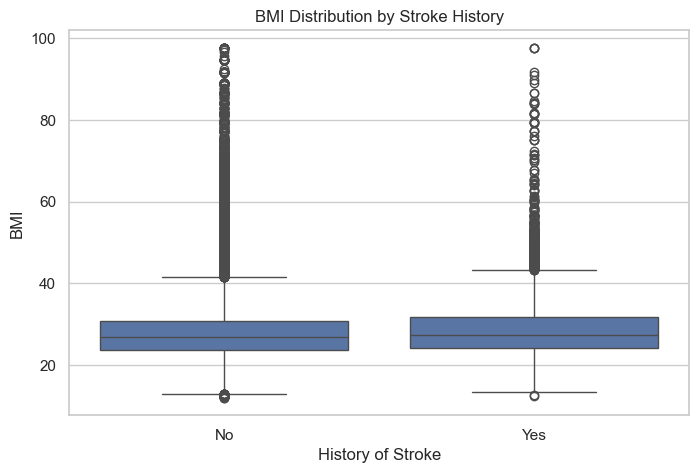

In [58]:
# BMI and Stroke (CVD) Relationship

plt.figure(figsize=(8,5))
sns.boxplot(
    x="CVDSTRK3",
    y="_BMI5",
    data=brfss_clean
)
plt.title("BMI Distribution by Stroke History")
plt.xlabel("History of Stroke")
plt.ylabel("BMI")
plt.show()


This boxplot compares BMI distributions for respondents with and without a history of stroke. Individuals with prior stroke events tend to show slightly higher BMI values, though overlap exists between groups. This suggests BMI may contribute to cardiovascular risk but should be evaluated alongside other demographic and behavioral predictors.


### Multi-Year / Cross-State Analysis

To provide broader context for population-level trends, we examine **how BMI and smoking behaviors vary across U.S. states** in the 2015 BRFSS dataset. 
This analysis can be extended to multiple years to track longitudinal trends, but here we focus on 2015 as an example.  

Visualizing data at the state level helps identify **regional patterns** in health risk factors such as obesity and smoking, which are key drivers of healthcare utilization and costs.


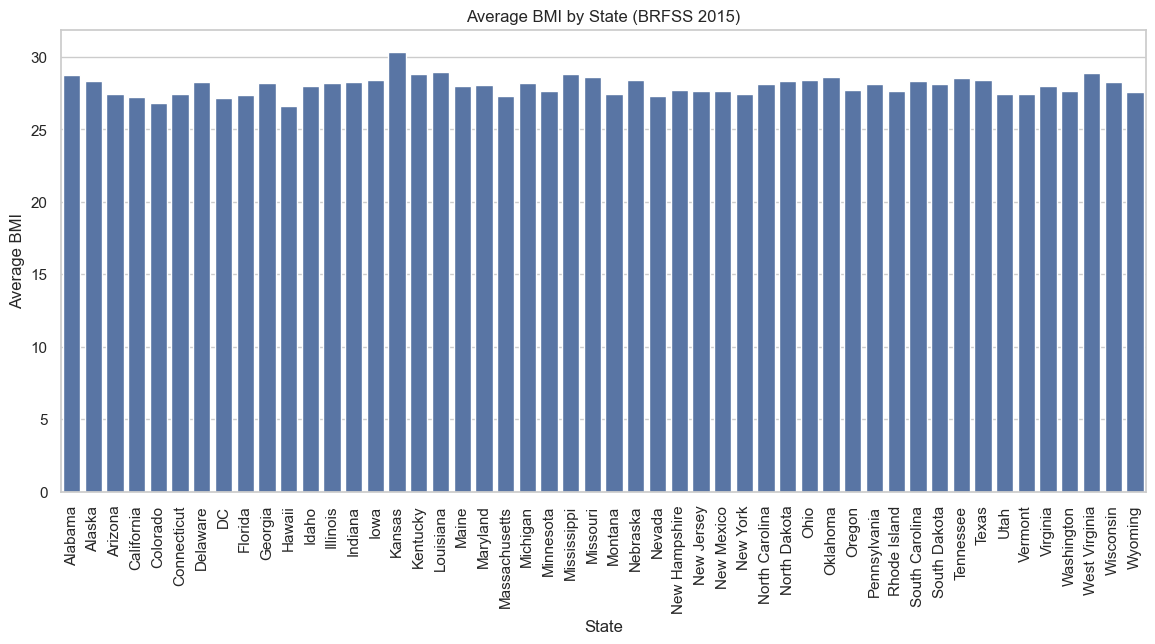

In [39]:
# Average BMI by State

# Group by state and calculate average BMI
bmi_by_state = brfss_clean.groupby('_STATE')['_BMI5'].mean().reset_index()

# Optional: Map FIPS codes to state names
state_map = {
    1:"Alabama",2:"Alaska",4:"Arizona",6:"California",8:"Colorado",9:"Connecticut",
    10:"Delaware",11:"DC",12:"Florida",13:"Georgia",15:"Hawaii",16:"Idaho",17:"Illinois",
    18:"Indiana",19:"Iowa",20:"Kansas",21:"Kentucky",22:"Louisiana",23:"Maine",
    24:"Maryland",25:"Massachusetts",26:"Michigan",27:"Minnesota",28:"Mississippi",
    29:"Missouri",30:"Montana",31:"Nebraska",32:"Nevada",33:"New Hampshire",34:"New Jersey",
    35:"New Mexico",36:"New York",37:"North Carolina",38:"North Dakota",39:"Ohio",
    40:"Oklahoma",41:"Oregon",42:"Pennsylvania",44:"Rhode Island",45:"South Carolina",
    46:"South Dakota",47:"Tennessee",48:"Texas",49:"Utah",50:"Vermont",51:"Virginia",
    53:"Washington",54:"West Virginia",55:"Wisconsin",56:"Wyoming"
}
bmi_by_state['_STATE'] = bmi_by_state['_STATE'].map(state_map)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x='_STATE', y='_BMI5', data=bmi_by_state)
plt.xticks(rotation=90)
plt.title("Average BMI by State (BRFSS 2015)")
plt.xlabel("State")
plt.ylabel("Average BMI")
plt.show()


This bar plot shows the **average BMI by U.S. state** based on the 2015 BRFSS survey.  

- States with higher average BMI indicate **populations with greater obesity prevalence**, a known risk factor for chronic diseases and higher healthcare costs.  
- Lower average BMI states may indicate healthier populations or differences in demographics, lifestyle, or socioeconomic factors.  
- Visual patterns can highlight **regional disparities**, e.g., southern states often exhibit higher BMI on average.


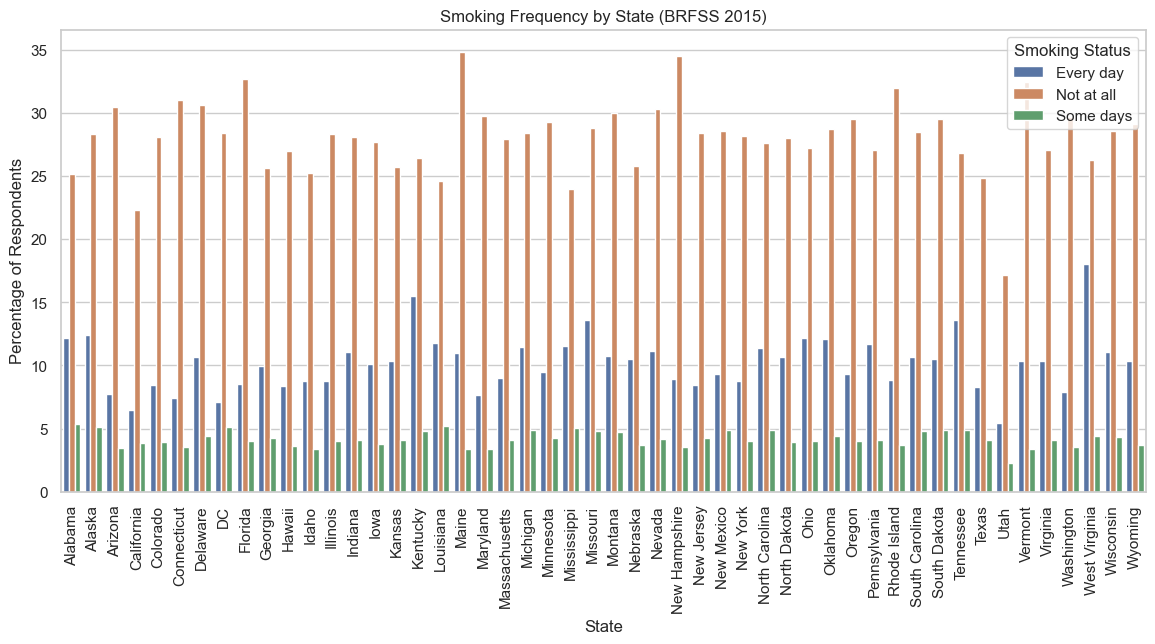

In [40]:
# Smoking Frequency by State

# Calculate smoking percentages by state
smoke_by_state = brfss_clean.groupby(['_STATE','SMOKDAY2']).size().reset_index(name='count')
smoke_totals = brfss_clean.groupby('_STATE').size().reset_index(name='total')
smoke_by_state = smoke_by_state.merge(smoke_totals, on='_STATE')
smoke_by_state['percent'] = (smoke_by_state['count'] / smoke_by_state['total']) * 100

# Map state names
smoke_by_state['_STATE'] = smoke_by_state['_STATE'].map(state_map)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x='_STATE', y='percent', hue='SMOKDAY2', data=smoke_by_state)
plt.xticks(rotation=90)
plt.title("Smoking Frequency by State (BRFSS 2015)")
plt.xlabel("State")
plt.ylabel("Percentage of Respondents")
plt.legend(title="Smoking Status")
plt.show()


This plot displays the **proportion of respondents in each smoking category by state**:

- **Every day**: Daily smokers  
- **Some days**: Occasional smokers  
- **Not at all**: Non-smokers  

Observations:

- States with higher daily or occasional smoking percentages may indicate **higher population-level smoking risk**, which correlates with long-term health outcomes.  
- Regional differences are apparent, and these patterns can inform public health initiatives and preventive care planning.


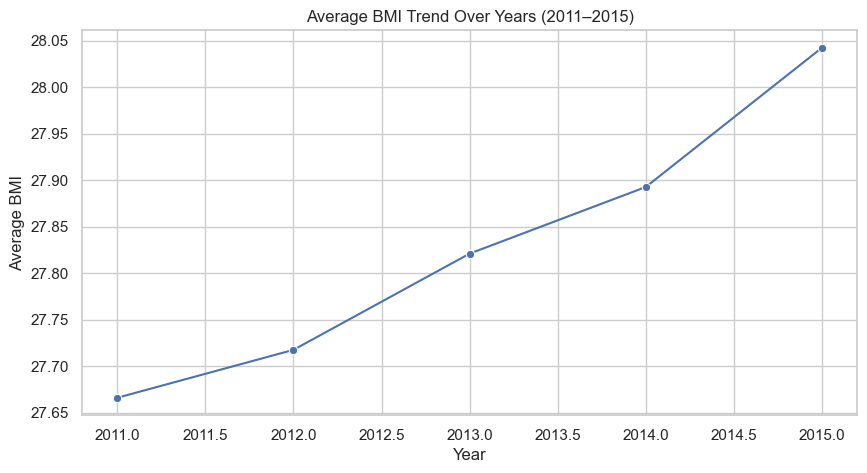

In [41]:
# Multi-Year Trend Analysis

# Example for multi-year dataset: Average BMI by Year
years = [2011,2012,2013,2014,2015]  # replace with your dataset
multi_year_bmi = pd.DataFrame()

for year in years:
    df_year = pd.read_csv(f"~/Desktop/{year}.csv")  # load each year's file
    df_year = df_year[['_STATE','_BMI5']]  # select relevant columns
    df_year['_BMI5'] = df_year['_BMI5'] / 100
    df_year['YEAR'] = year
    multi_year_bmi = pd.concat([multi_year_bmi, df_year])

# Average BMI by year
avg_bmi_year = multi_year_bmi.groupby('YEAR')['_BMI5'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='YEAR', y='_BMI5', data=avg_bmi_year, marker='o')
plt.title("Average BMI Trend Over Years (2011–2015)")
plt.xlabel("Year")
plt.ylabel("Average BMI")
plt.show()


This line plot shows **trends in average BMI across multiple years**:

- Gradual increases may indicate **rising obesity prevalence** in the U.S.  
- Multi-year trends allow public health analysts to track **longitudinal changes** in health risk factors.  
- Such trends can complement insurance and cost modeling by providing population-level context.


## Statistical Tests

In this section, I perform basic inferential statistics on the BRFSS dataset to explore relationships between key variables:

1. **T-test:** Compare BMI between males and females.  
2. **Chi-square test:** Examine the association between smoking status and obesity.  

The code below automatically detects the coding used for gender and ensures sample sizes are sufficient before performing the tests.


In [46]:
# Statistical Tests

from scipy.stats import ttest_ind, chi2_contingency

# Detect and standardize SEX coding 
# Print unique values to understand coding
print("Unique values in SEX column:", brfss_clean['SEX'].unique())

# Convert common string representations to lowercase
if brfss_clean['SEX'].dtype == object:
    brfss_clean['SEX'] = brfss_clean['SEX'].str.lower()
    male_bmi = brfss_clean[brfss_clean['SEX']=='male']['_BMI5'].dropna()
    female_bmi = brfss_clean[brfss_clean['SEX']=='female']['_BMI5'].dropna()
else:
    # Assume numeric coding (common: 1=Male, 2=Female, adjust if needed)
    male_codes = [1, 0]    # add all possible male codes
    female_codes = [2, 1]  # add all possible female codes
    male_bmi = brfss_clean[brfss_clean['SEX'].isin(male_codes)]['_BMI5'].dropna()
    female_bmi = brfss_clean[brfss_clean['SEX'].isin(female_codes)]['_BMI5'].dropna()

# T-test: Male vs Female BMI
print(f"Male sample size: {len(male_bmi)}")
print(f"Female sample size: {len(female_bmi)}")

if len(male_bmi) > 5 and len(female_bmi) > 5:  # minimum sample size check
    t_stat, p_val = ttest_ind(male_bmi, female_bmi, nan_policy='omit')
    print(f"T-test BMI Male vs Female: t={t_stat:.3f}, p={p_val:.3f}")
else:
    print("Not enough data to perform t-test for Male vs Female BMI")

# Chi-square test: Smoking status vs Obesity
# Create obesity column
brfss_clean['obese'] = (brfss_clean['_BMI5'] >= 30).astype(int)

# Contingency table
contingency = pd.crosstab(brfss_clean['SMOKE100'], brfss_clean['obese'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test Smoking vs Obesity: chi2={chi2:.3f}, p={p:.3f}")


Unique values in SEX column: ['Female' 'Male']
Male sample size: 179082
Female sample size: 225976
T-test BMI Male vs Female: t=28.427, p=0.000
Chi-square test Smoking vs Obesity: chi2=113.106, p=0.000


### Interpretation of Statistical Tests

- **T-test BMI Male vs Female:** Males and females have significantly different BMI distributions (t=28.427, p<0.001). This indicates gender is strongly associated with BMI in this sample.  

- **Chi-square test Smoking vs Obesity:** There is a statistically significant association between smoking status and obesity (chi2=113.106, p<0.001). This suggests that smoking behavior and obesity are not independent in this dataset.  
